In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
%matplotlib inline

In [4]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img):
    shape = img.shape
    img = img[math.floor(shape[0]/4):shape[0]-25, 0:shape[1]]
    img = cv2.resize(img,(64,64), interpolation=cv2.INTER_AREA)
    return img
#     return img[59:138:2, 0:-1:2, :]

def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)

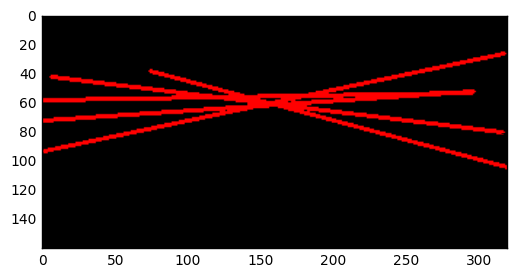

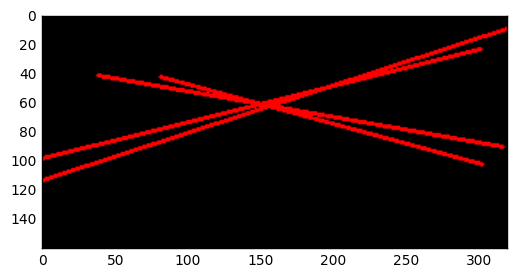

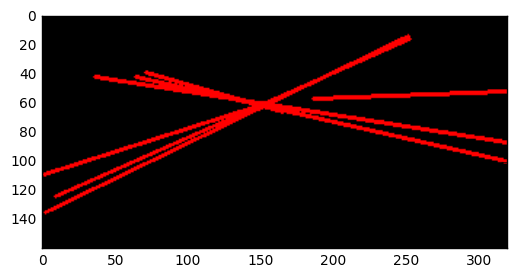

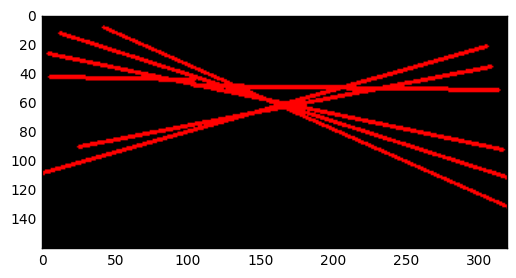

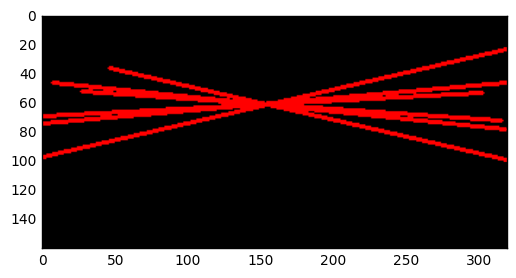

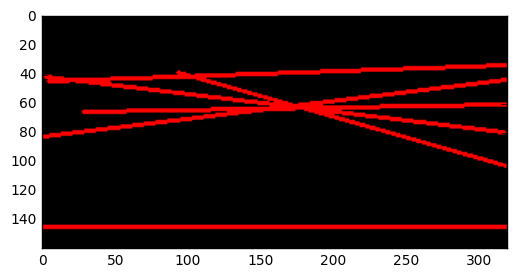

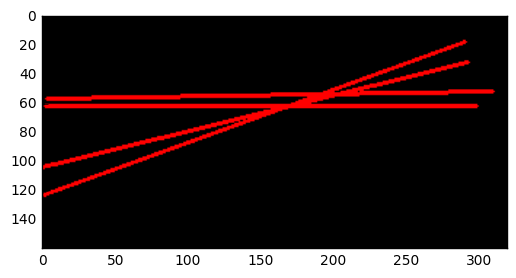

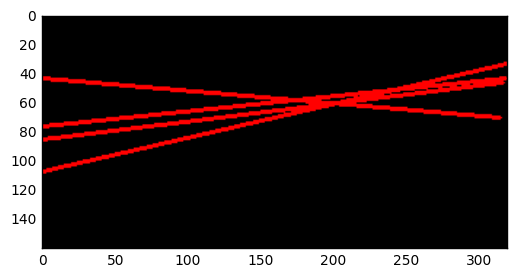

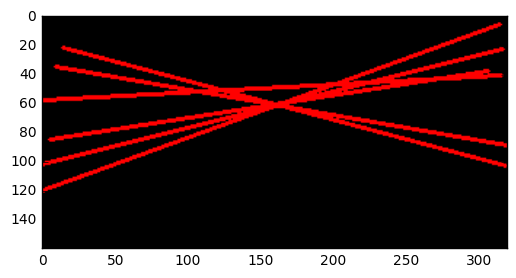

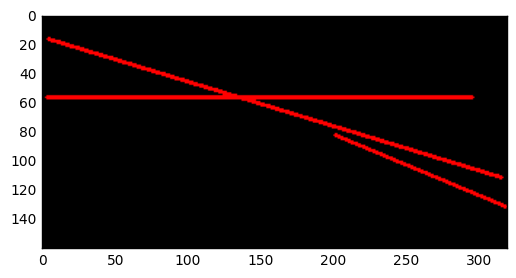

In [45]:
import pandas as pd

def pre(img):
    img = grayscale(img)
    img = gaussian_blur(img, 5)
    img = canny(img, 50, 150)
    img = hough_lines(img, 1, np.pi/180, 100, 50, 50)
    return img

csv = pd.read_csv('data/driving_log.csv')
images = csv.center.values
images = np.random.choice(images, 10)
images = [pre(mpimg.imread('data/'+img)) for img in images]

# plt.figure(figsize=(9,9))
for i, img in enumerate(images):
#     plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.figure()
#     plt.axis('off')